brew install sqlite

sqlite3 --version

sqlite3 parchposey.db < parch-and-posey.sql

sqlite3 parchposey.db

.tables;               -- list all tables
.schema web_events;    -- show schema for one table
SELECT * FROM web_events LIMIT 5;  -- sample query


.quit




In [1]:
import sqlite3
import pandas as pd

def run_query(query: str, db_path: str = "parchposey.db") -> pd.DataFrame:
    con = sqlite3.connect(db_path)
    cur = con.cursor()
    cur.execute(query)

    # Get column names from cursor description
    cols = [desc[0] for desc in cur.description]

    # Fetch all rows
    rows = cur.fetchall()

    # Put into a DataFrame
    df = pd.DataFrame(rows, columns=cols)

    con.close()
    return df

# Example usage
run_query("SELECT * FROM web_events LIMIT 5;")


,id,account_id,occurred_at,channel
0,1,1001,2015-10-06 17:13:58,direct
1,2,1001,2015-11-05 03:08:26,direct
2,3,1001,2015-12-04 03:57:24,direct
3,4,1001,2016-01-02 00:55:03,direct
4,5,1001,2016-02-01 19:02:33,direct


In [2]:
run_query("SELECT COUNT(*) FROM web_events;")

,COUNT(*)
0,9073


In [3]:
run_query("SELECT DISTINCT channel FROM web_events;")

,channel
0,direct
1,facebook
2,organic
3,adwords
4,twitter
5,banner


In [4]:
run_query("SELECT * FROM orders;")

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43
1,2,1001,2015-11-05 03:34:33,190,41,57,288,948.10,307.09,462.84,1718.03
2,3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.00,776.18
3,4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.00,958.24
4,5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49
...,...,...,...,...,...,...,...,...,...,...,...
6907,6908,4501,2016-06-29 04:03:39,11,199,59,269,54.89,1490.51,479.08,2024.48
6908,6909,4501,2016-07-29 19:58:32,5,91,96,192,24.95,681.59,779.52,1486.06
6909,6910,4501,2016-08-27 00:58:11,16,94,82,192,79.84,704.06,665.84,1449.74
6910,6911,4501,2016-11-22 06:52:22,63,67,81,211,314.37,501.83,657.72,1473.92


# ERD



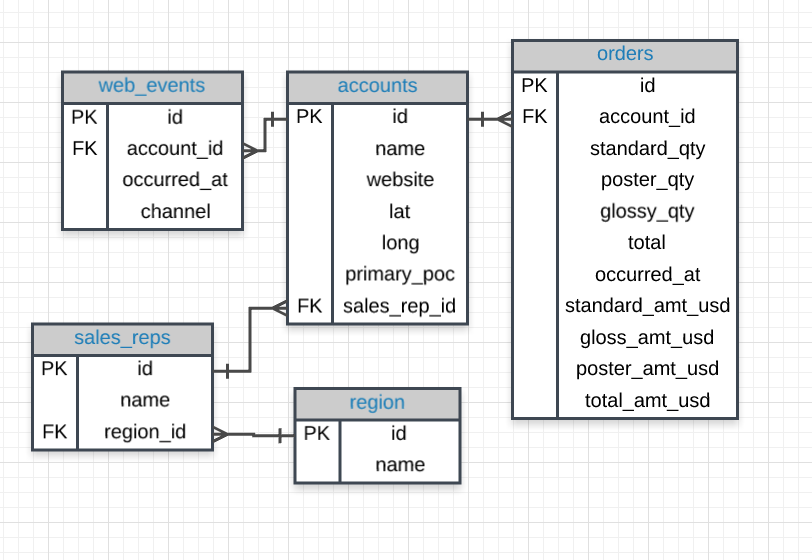

In [5]:
run_query("SELECT * FROM accounts limit 500;")

,id,name,website,lat,long,primary_poc,sales_rep_id
0,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
1,1011,Exxon Mobil,www.exxonmobil.com,41.169156,-73.849374,Sung Shields,321510
2,1021,Apple,www.apple.com,42.290495,-76.084009,Jodee Lupo,321520
3,1031,Berkshire Hathaway,www.berkshirehathaway.com,40.949021,-75.763898,Serafina Banda,321530
4,1041,McKesson,www.mckesson.com,42.217093,-75.284998,Angeles Crusoe,321540
...,...,...,...,...,...,...,...
346,4461,KKR,www.kkr.com,45.545353,-122.655247,Buffy Azure,321970
347,4471,Oneok,www.oneok.com,45.513513,-122.681500,Esta Engelhardt,321960
348,4481,Newmont Mining,www.newmont.com,45.494117,-122.669460,Khadijah Riemann,321970
349,4491,PPL,www.pplweb.com,45.491720,-122.671880,Deanne Hertlein,321960


In [10]:
# Use the accounts table to create first and last name columns that hold the first and last names for the primary_poc.

run_query("""

SELECT
    primary_poc,
    LEFT(primary_poc, STRPOS(primary_poc, ' ')) AS first_name,
    RIGHT(primary_poc, LENGTH(primary_poc) - STRPOS(primary_poc, ' ')) as last_name

FROM accounts limit 500;


""")

OperationalError: no such function: STRPOS

# Query Optimisation